### Let's climb "the leaderboards"
i.e. improve our score from our last model

In [1]:
#import things needed for baseline and data 
#don't worry if there are some things you haven't seen yet, we'll go through it.
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting House Prices 💰🏡💰
### We'll work on the same model, but this time we'll do better. :happysteurer:

In [2]:
#repeat see last notebook for line by line comments explanations of old stuff
data = fetch_openml(name="house_prices", as_frame=True)
ames = data['data']
ames['Price'] = data['target']
#we'll keep a few more features this time to show some interactions
housing = ames[['LotArea', 'FullBath', 'Price', 'GrLivArea', 'YearBuilt']]

In [3]:
y = housing.Price
features = ['LotArea', 'FullBath', 'GrLivArea', 'YearBuilt']
X = housing[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)

In [5]:
housing.corr()

,LotArea,FullBath,Price,GrLivArea,YearBuilt
LotArea,1.000000,0.126031,0.263843,0.263116,0.014228
FullBath,0.126031,1.000000,0.560664,0.630012,0.468271
Price,0.263843,0.560664,1.000000,0.708624,0.522897
GrLivArea,0.263116,0.630012,0.708624,1.000000,0.199010
YearBuilt,0.014228,0.468271,0.522897,0.199010,1.000000


In [6]:
#use root mean squared error so the error looks more meaningful
#gradient descent wouldn't care
def rmse(y_pred, y_true):
    return np.sqrt(mse(y_pred, y_true))

In [7]:
test_error = rmse(test_predictions, y_test)
print(f"our mean squared error for the test set is {test_error}")

our mean squared error for the test set is 49302.932286924544


In [8]:
#initialize a dictionary to keep track of stuff
results = {}
#add item to dict
results['baseline'] = test_error

In [9]:
experiments = pd.DataFrame.from_dict(results, orient='index', columns = ['test_error'])

# Non Linear Features Relationships between features and your target
Remember to graph and explore your data.

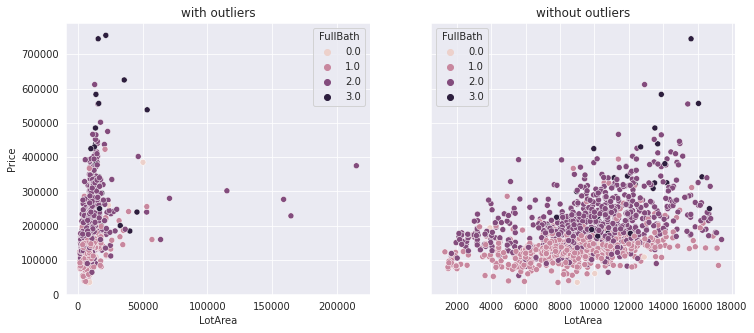

In [10]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize = (12,5), sharey=True)

axes[0].set_title("with outliers")
sns.scatterplot(ax = axes[0], x = "LotArea", y = "Price", hue="FullBath", data = housing);
axes[1].set_title("without outliers")
sns.scatterplot(ax = axes[1], x = "LotArea", y = "Price", hue="FullBath",
            data = housing[housing.LotArea < housing.LotArea.quantile(q=0.95)]);

Well the right looks somewhat exponential/quadratic?

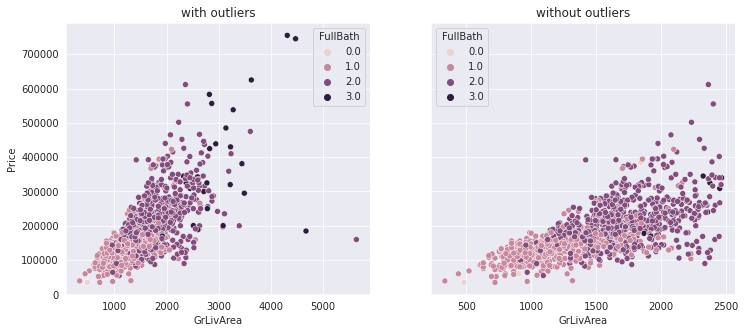

In [11]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize = (12,5), sharey=True)

axes[0].set_title("with outliers")
sns.scatterplot(ax = axes[0], x = "GrLivArea", y = "Price", hue="FullBath", data = housing);
axes[1].set_title("without outliers")
sns.scatterplot(ax = axes[1], x = "GrLivArea", y = "Price", hue="FullBath",
            data = housing[housing.GrLivArea < housing.GrLivArea.quantile(q=0.95)]);

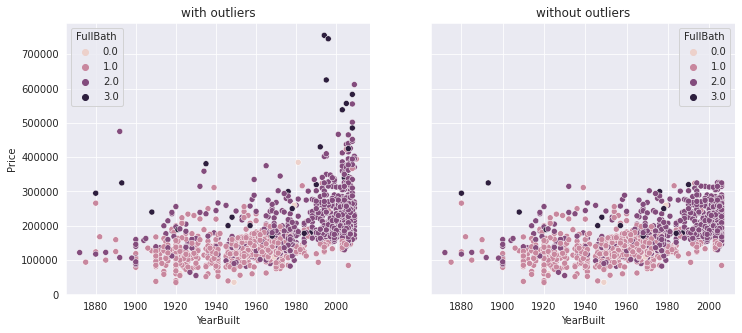

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (12,5), sharey=True)

axes[0].set_title("with outliers")
sns.scatterplot(ax = axes[0], x = "YearBuilt", y = "Price", hue="FullBath", data = housing);
axes[1].set_title("without outliers")
sns.scatterplot(ax = axes[1], x = "YearBuilt", y = "Price", hue="FullBath",
            data = housing[(housing.YearBuilt < housing.YearBuilt.quantile(q=0.95)) & (housing.Price < housing.Price.quantile(q=0.95))]);

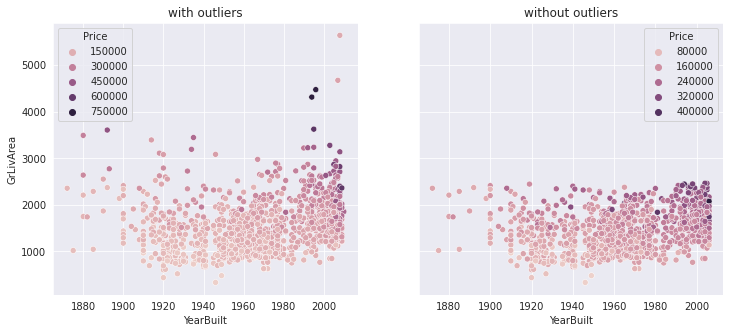

In [13]:
#Often it is worth checking out of there are interactions within features, in our case, at least to me it doesn't seem like it
fig, axes = plt.subplots(1, 2, figsize = (12,5), sharey=True)

axes[0].set_title("with outliers")
sns.scatterplot(ax = axes[0], x = "YearBuilt", y = "GrLivArea", hue="Price", data = housing);
axes[1].set_title("without outliers")
sns.scatterplot(ax = axes[1], x = "YearBuilt", y = "GrLivArea", hue="Price",
            data = housing[(housing.GrLivArea < housing.GrLivArea.quantile(q=0.95)) & (housing.YearBuilt < housing.YearBuilt.quantile(q=0.95))]);

In [14]:
#you can also check correlation if visual is not your thing
X.corr()

,LotArea,FullBath,GrLivArea,YearBuilt
LotArea,1.000000,0.126031,0.263116,0.014228
FullBath,0.126031,1.000000,0.630012,0.468271
GrLivArea,0.263116,0.630012,1.000000,0.199010
YearBuilt,0.014228,0.468271,0.199010,1.000000


## Polynomial features
sklearns preprocessing module has a function https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html that you can use to create polynomial features on the fly.
But watch out for feature explosion! 
It's often more efficient to just do it by hand.

In [15]:
#yearbuilt looks like it has a somewhat quadratic relationship, lets see if it helps
X_train['yearsq'] = X_train.YearBuilt**2
X_test['yearsq'] = X_test.YearBuilt**2
# exp
X_train['yearexp'] = X_train.YearBuilt.apply(np.log)
X_test['yearexp'] = X_test.YearBuilt.apply(np.log)

#Lot area too, lets try that
X_train['lotsq'] = X_train.LotArea**2
X_test['lotsq'] = X_test.LotArea**2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [16]:
features = ['FullBath', 'LotArea', 'yearsq', 'GrLivArea', 'YearBuilt', 'lotsq']
model = LinearRegression()
model.fit(X_train[features], y_train)
test_predictions = model.predict(X_test[features])
test_error = rmse(test_predictions, y_test)
results['quadratic'] = test_error
experiments = pd.DataFrame.from_dict(results, orient='index', columns = ['test_error'])
experiments.head()

,test_error
baseline,49302.932287
quadratic,47773.863439


In [17]:
experiments.loc['quadratic'] - experiments.loc['baseline']

test_error   -1529.068848
dtype: float64

In [18]:
print(f"Error difference between baseline and quadratic {experiments.loc['quadratic'] - experiments.loc['baseline']}")

Error difference between baseline and quadratic test_error   -1529.068848
dtype: float64


### Yay, small improvement!
Maybe you want to add a cell and check the training error <br/>
Add higher degree polynomials<br/>
and try using the exp. feature in a fit we haven't used yet.<br/>
Think about using only one of the two, or experiment, why is it likely not good to use both?

## Outliers
High leverage and High influence points can hurt and influence your model as you've seen in the lecture (nice graph right?) <br/>
Let's see if our model does better without them.


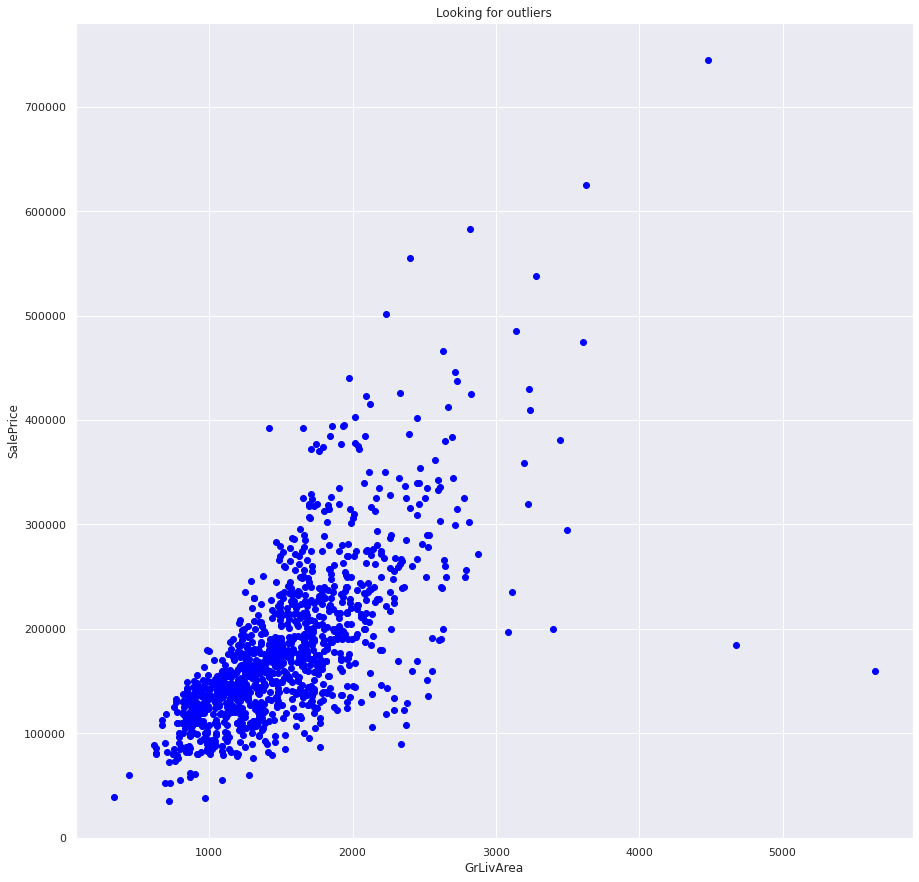

In [19]:
sns.set(rc={'figure.figsize':(15,15)})
plt.scatter(X_train.GrLivArea, y_train, c = "blue")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

#outliers bad, go away
X_train_outliers = X_train[X_train.GrLivArea < 4000].copy()
y_train_outliers = y_train[X_train.GrLivArea < 4000].copy()

In [20]:
model = LinearRegression()
model.fit(X_train_outliers[features], y_train_outliers)
test_predictions = model.predict(X_test[features])
test_error = rmse(test_predictions, y_test)
results['fewer outliers'] = test_error
experiments = pd.DataFrame.from_dict(results, orient='index', columns = ['test_error'])
experiments.head()

,test_error
baseline,49302.932287
quadratic,47773.863439
fewer outliers,46844.717702


In [21]:
experiments.loc['fewer outliers'] - experiments.loc['quadratic']

test_error   -929.145736
dtype: float64

# yay another small improvement to the previous improvement!
now this was very visual, but you can also achieve the same with looking at some pandas statistics

In [22]:
X.describe()

,LotArea,FullBath,GrLivArea,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1.565068,1515.463699,1971.267808
std,9981.264932,0.550916,525.480383,30.202904
min,1300.000000,0.000000,334.000000,1872.000000
25%,7553.500000,1.000000,1129.500000,1954.000000
50%,9478.500000,2.000000,1464.000000,1973.000000
75%,11601.500000,2.000000,1776.750000,2000.000000
max,215245.000000,3.000000,5642.000000,2010.000000


In [23]:
#then use a mask like this to get rid of the outliers
#We'll only get rid of outliers to the right, but you can try to add a boolean to the left see if it helps and 95th percentile is arbitray, I think .75 is more like we did already
mask = X_train.LotArea < X_train.quantile(q = 0.95).LotArea

#exercise: make mask for GrLivArea we did manually with quantiles like above and apply:

# experiments = pd.DataFrame.from_dict(results, orient='index', columns = ['test_error'])
# experiments.head()

# Le Trade Off the Bias et Variance :cringe: & Cross Validation
### we can actually make use of this
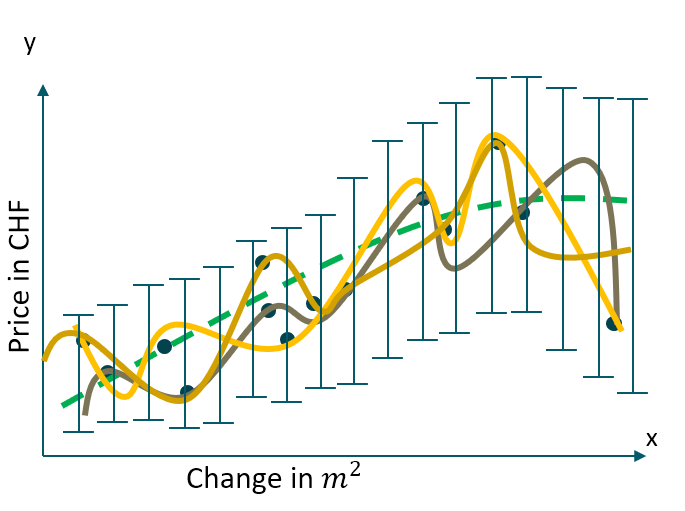

In [24]:
n_folds = 5
#this lets you create 5 folds on which you can train and validate on you import it from sklearn.model_selection
kfold = KFold(n_splits = n_folds, random_state = 42) #you could shuffle but lets keep it simple
#Cross validation is huge, I may add another notebook later, here it mainly serves a different purpose than assesing your models robustness, though we get this too as a gift
predictions = np.zeros_like(y_test) # see numpy pandas minireference
val_scores = 0
X_train_outliers.reset_index(inplace = True, drop = True)
for fold, (train_indices, validation_indices) in enumerate(kfold.split(X_train_outliers)): #note we still have our test set
    model = LinearRegression()
    #train on 4 folds
    model.fit(X_train_outliers.loc[train_indices, features], y_train_outliers.iloc[train_indices])
    #check performance on 5th fold
    val_pred = model.predict(X_train_outliers.loc[validation_indices, features])
    val_score = rmse(val_pred, y_train_outliers.iloc[validation_indices])
    print(f"score on fold {fold} was {val_score}")
    val_scores += val_score / n_folds
    #now the trick
    predictions += model.predict(X_test[features])
    
print(f"average validation score was {val_scores}")

score on fold 0 was 38384.291218222956
score on fold 1 was 39546.3296870538
score on fold 2 was 44872.3315609918
score on fold 3 was 42095.23942675825
score on fold 4 was 34956.97598440188
average validation score was 39971.03357548574


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [25]:
predictions = predictions / n_folds
test_error = rmse(predictions, y_test)
results['5fold'] = test_error
experiments = pd.DataFrame.from_dict(results, orient='index', columns = ['test_error'])
experiments.head()

,test_error
baseline,49302.932287
quadratic,47773.863439
fewer outliers,46844.717702
5fold,46829.185121


In [26]:
experiments.loc['5fold'] - experiments.loc['fewer outliers']

test_error   -15.532582
dtype: float64

### cheeky isn't it? try with better folds (split more equally, stratified or groupkfold with bins
### and try more folds! is there a performance tradeoff?

In [27]:
# Congrats, you basically done ensembling now, we don't need aml anymore

### ok, there is actually more to ensembling than this, let's try a few more.
### we are not restricted to linear regression, or even sklearn


## enter lightgbm, these are forests, which are actually ensembles of little decision trees, I'll make a cheatsheet on how they work later

In [28]:
from lightgbm import LGBMRegressor as lgb
n_folds = 5
#this lets you create 5 folds on which you can train and validate on you import it from sklearn.model_selection
kfold = KFold(n_splits = n_folds, random_state = 42) #you could shuffle but lets keep it simple
#Cross validation is huge, I may add another notebook later, here it mainly serves a different purpose than assesing your models robustness, though we get this too as a gift
predictions = np.zeros_like(y_test) # see numpy pandas minireference
X_train_outliers.reset_index(inplace = True, drop = True)
for fold, (train_indices, validation_indices) in enumerate(kfold.split(X_train_outliers)): #note we still have our test set
    model = lgb()
    #train on 4 folds
    model.fit(X_train_outliers.loc[train_indices, features], y_train_outliers.iloc[train_indices])
    #check performance on 5th fold
    val_pred = model.predict(X_train_outliers.loc[validation_indices, features])
    print(f"score on fold {fold} was {rmse(val_pred, y_train_outliers.iloc[validation_indices])}")
    #now the trick
    predictions += model.predict(X_test[features])
    
predictions = predictions / n_folds
test_error = rmse(predictions, y_test)
results['5fold_lgb'] = test_error
experiments = pd.DataFrame.from_dict(results, orient='index', columns = ['test_error'])

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


score on fold 0 was 36804.27321975706
score on fold 1 was 39077.91341735115
score on fold 2 was 43078.16288622477
score on fold 3 was 37942.479408124054
score on fold 4 was 31519.429259781245


In [29]:
experiments.loc['5fold_lgb'] - experiments.loc['5fold']

test_error   -6189.460047
dtype: float64

In [30]:
## to do, go find randomforestregressor on sklearn and use that and ridge/lasso/elasticnet (what about the parameters, how would you now choose the best ones?)
### todo ###

# n_folds = 5
# #this lets you create 5 folds on which you can train and validate on you import it from sklearn.model_selection
# kfold = KFold(n_splits = n_folds, random_state = 42) #you could shuffle but lets keep it simple
# #Cross validation is huge, I may add another notebook later, here it mainly serves a different purpose than assesing your models robustness, though we get this too as a gift
# predictions = np.zeros_like(y_test) # see numpy pandas minireference
# X_train_outliers.reset_index(inplace = True, drop = True)
# for fold, (train_indices, validation_indices) in enumerate(kfold.split(X_train_outliers)): #note we still have our test set
#     model = ###
#     #train on 4 folds
#     model.fit(X_train_outliers.loc[train_indices, features], y_train_outliers.iloc[train_indices])
#     #check performance on 5th fold
#     val_pred = model.predict(X_train_outliers.loc[validation_indices, features])
#     print(f"score on fold {fold} was {rmse(val_pred, y_train_outliers.iloc[validation_indices])}")
#     #now the trick
#     predictions += model.predict(X_test[features])
    
# predictions = predictions / n_folds
# test_error = rmse(predictions, y_test)
# results['5fold_best_model_uwu'] = test_error
# experiments = pd.DataFrame.from_dict(results, orient='index', columns = ['test_error'])

# but, can we do better? 

In [31]:
n_folds = 5
#this lets you create 5 folds on which you can train and validate on you import it from sklearn.model_selection
kfold = KFold(n_splits = n_folds, random_state = 42) #you could shuffle but lets keep it simple
#Cross validation is huge, I may add another notebook later, here it mainly serves a different purpose than assesing your models robustness, though we get this too as a gift
predictions = np.zeros_like(y_test) # see numpy pandas minireference
X_train_outliers.reset_index(inplace = True, drop = True)
for fold, (train_indices, validation_indices) in enumerate(kfold.split(X_train_outliers)): #note we still have our test set
    model1 = lgb()
    model2 = LinearRegression()
    #train on 4 folds
    model1.fit(X_train_outliers.loc[train_indices, features], y_train_outliers.iloc[train_indices])
    model2.fit(X_train_outliers.loc[train_indices, features], y_train_outliers.iloc[train_indices])
    #check performance on 5th fold
    val_pred = model1.predict(X_train_outliers.loc[validation_indices, features]) + model2.predict(X_train_outliers.loc[validation_indices, features])
    val_pred = val_pred / 2.0
    print(f"score on fold {fold} was {rmse(val_pred, y_train_outliers.iloc[validation_indices])}")
    #now the trick
    predictions += (model1.predict(X_test[features]) + model2.predict(X_test[features])) / 2.0
    
predictions = predictions / n_folds
test_error = rmse(predictions, y_test)
results['5fold_mix'] = test_error
experiments = pd.DataFrame.from_dict(results, orient='index', columns = ['test_error'])

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


score on fold 0 was 35092.15829856064
score on fold 1 was 37019.948982032256
score on fold 2 was 41931.87628020813
score on fold 3 was 37893.23572115866
score on fold 4 was 31018.597373848384


In [32]:
experiments

,test_error
baseline,49302.932287
quadratic,47773.863439
fewer outliers,46844.717702
5fold,46829.185121
5fold_lgb,40639.725073
5fold_mix,42105.392347


In [33]:
experiments.loc['5fold_mix'] - experiments.loc['5fold_lgb']

test_error    1465.667274
dtype: float64

### ah, failure

In [34]:
n_folds = 5
#this lets you create 5 folds on which you can train and validate on you import it from sklearn.model_selection
kfold = KFold(n_splits = n_folds, random_state = 42) #you could shuffle but lets keep it simple
#Cross validation is huge, I may add another notebook later, here it mainly serves a different purpose than assesing your models robustness, though we get this too as a gift
predictions = np.zeros_like(y_test) # see numpy pandas minireference
X_train_outliers.reset_index(inplace = True, drop = True)
for fold, (train_indices, validation_indices) in enumerate(kfold.split(X_train_outliers)): #note we still have our test set
    model1 = lgb()
    model2 = LinearRegression()
    #train on 4 folds
    model1.fit(X_train_outliers.loc[train_indices, features], y_train_outliers.iloc[train_indices])
    model2.fit(X_train_outliers.loc[train_indices, features], y_train_outliers.iloc[train_indices])
    #check performance on 5th fold
    val_pred = model1.predict(X_train_outliers.loc[validation_indices, features])*0.6 + model2.predict(X_train_outliers.loc[validation_indices, features])*0.4
    print(f"score on fold {fold} was {rmse(val_pred, y_train_outliers.iloc[validation_indices])}")
    #now the trick
    predictions += (model1.predict(X_test[features])*0.6 + model2.predict(X_test[features])*0.4)
    
predictions = predictions / n_folds
test_error = rmse(predictions, y_test)
results['5fold_weighted'] = test_error
experiments = pd.DataFrame.from_dict(results, orient='index', columns = ['test_error'])

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


score on fold 0 was 35026.83870079206
score on fold 1 was 37064.73499751599
score on fold 2 was 41827.69706049116
score on fold 3 was 37542.728930208905
score on fold 4 was 30742.884780463202


In [35]:
experiments.loc['5fold_weighted'] - experiments.loc['5fold_lgb']

test_error    889.80859
dtype: float64

### hmm, it seems like we could find the right weights, sound familiar?

### yes, that's just x1 * w1 + x2 * w2 + w0
# if that gives you an idea, try it, there is many ways to utilize this insight 🔬🧪🧮

In [36]:
### to do ### 
# throw spaghetti at the wall and see what sticks

# mega to do # 
try Lasso and look at .coefs_ to choose features, not everything is helpful and a lot of features may hurt, redundancy is poison!